
# Project Title: RFM Analysis and Customers Segmentation
# Project Objective
"""
This project aims to analyze customer purchasing behavior using RFM (Recency, Frequency, and Monetary) analysis. 
By segmenting customers based on their shopping patterns, businesses can identify high-value customers, retain at-risk customers, 
and implement targeted marketing strategies.
"""

# 1. Load packages for analysis and load project csv file (Retail_Sales)

In [88]:
import pandas as df
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
project = r"C:\Users\OLAKARI\Downloads\Retail_Sales.csv"
project = df.read_csv(project)
project.head(5)

,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount,Store_Location,Payment_Method,Customer_Type,Discount_Applied,Final_Amount,Day_of_the_Week,Sales_Representative,Total_Amount_Normalized,Final_Amount_Normalized
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Miami,Credit Card,Returning,10.93,133.605,Friday,Kathryn Baker,0.050505,0.045892
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Los Angeles,Debit Card,Returning,10.87,891.300,Monday,Tara Herrera,0.393939,0.352002
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Houston,Mobile Payment,Returning,14.10,25.770,Friday,Russell Dunn,0.002020,0.002326
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Los Angeles,Cash,Returning,6.13,469.350,Sunday,Kevin Mitchell,0.191919,0.181533
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Boston,Cash,VIP,0.01,99.990,Saturday,Kathryn Baker,0.030303,0.032311


# 2. RFM Metrics and Values
## calculating the recency, frequency and monetary values,rfm score and Customers segmentation according to produdct sales

In [90]:
# Convert Date column to datetime format
project['Date'] = df.to_datetime(project['Date'])
# Set reference date for Recency calculation
Last_transaction = project['Date'].max()
Last_transaction

# Calculate RFM metrics
rfm = project.groupby('Customer_ID').agg(
    Recency=('Date', lambda x: (Last_transaction - x.max()).days),  # Days since last purchase
    Frequency=('Transaction_ID', 'count'),  # Number of purchases
    Monetary=('Total_Amount', 'sum')  # Total amount spent
).reset_index()
print(rfm.head(3))

# Assign scores using quantiles (1-5 scale)
rfm['R_Score'] = df.qcut(rfm['Recency'], q=5, labels=[5, 4, 3, 2, 1]).astype(int)
rfm['F_Score'] = df.qcut(rfm['Frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5]).astype(int)
rfm['M_Score'] = df.qcut(rfm['Monetary'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5]).astype(int)
print(rfm['R_Score'].unique())
print(rfm['F_Score'].unique())
print(rfm['M_Score'].unique())

# Create a combined RFM Score
# concatenate our RFM Scores
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'].head(4)

  Customer_ID  Recency  Frequency  Monetary
0     CUST001       52          1       150
1     CUST002      322          1      1000
2     CUST003      367          1        30
[5 1 2 4 3]
[1 5 2 3 4]
[3 4 1 2 5]


0    513
1    114
2    111
3    214
Name: RFM_Score, dtype: object

#  Create Function to assign customer segments based on RFM scores

In [91]:
# Function to assign customer segments based on RFM scores

def assign_segment(rfm_score):
    if rfm_score in ['555', '554', '545', '544']:  
        return 'Best Customers'
    elif rfm_score[0] == '5':  
        return 'Loyal Customers'
    elif rfm_score in ['311', '211', '111', '112']:  
        return 'Lost Customers'
    elif rfm_score[0] == '1':  
        return 'At Risk'
    elif rfm_score in ['433', '343', '334']:  
        return 'Potential Loyalists'
    else:
        return 'Others'

    
# Apply segmentation function
rfm['Segment'] = rfm['RFM_Score'].apply(assign_segment)
rfm['Segment']
print(rfm.head(5))

  Customer_ID  Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
0     CUST001       52          1       150        5        1        3   
1     CUST002      322          1      1000        1        1        4   
2     CUST003      367          1        30        1        1        1   
3     CUST004      239          1       500        2        1        4   
4     CUST005      254          1       100        2        1        2   

  RFM_Score          Segment  
0       513  Loyal Customers  
1       114          At Risk  
2       111   Lost Customers  
3       214           Others  
4       212           Others  


# Creating a bar chart to plot a chart ( count of Customers by rfm score)

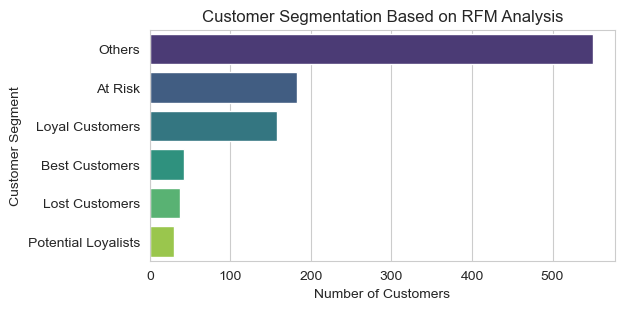

,Customer_ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,CUST001,52,1,150,5,1,3,513,Loyal Customers
1,CUST002,322,1,1000,1,1,4,114,At Risk
2,CUST003,367,1,30,1,1,1,111,Lost Customers


In [94]:
# Count plot for customer segments
plt.figure(figsize=(6, 3))
sns.set_style("whitegrid")
sns.countplot(y=rfm['Segment'], order=rfm['Segment'].value_counts().index, palette="viridis")
plt.xlabel("Number of Customers")
plt.ylabel("Customer Segment")
plt.title("Customer Segmentation Based on RFM Analysis")
plt.show()
# Display the final RFM table
rfm.head(3)


# Conclusion
"""
The RFM analysis provided insights into customer behavior by categorizing them into different segments. 
From the analysis, we identified high-value customers (Best Customers), at-risk customers, and lost customers. 
This segmentation enables businesses to focus their marketing efforts more effectively.
"""

# Recommendations
"""
1. **Retain Best Customers:** Offer loyalty rewards, exclusive discounts, and personalized offers to keep them engaged.
2. **Win Back At-Risk Customers:** Send re-engagement campaigns, discounts, and reminders to inactive customers.
3. **Convert Potential Loyalists:** Encourage them with incentives and exclusive offers to increase their frequency of purchases.
4. **Reduce Churn for Lost Customers:** Understand why they stopped purchasing and consider special win-back campaigns.
5. **Continuous Monitoring:** Regularly update the RFM analysis to track customer behavior changes and adjust marketing strategies accordingly.
"""